# PV Mismatch Simulation

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from pv_system import create_system, create_Rsh_degraded_system, create_Rs_degraded_system, plot_pv_system
from mismatch_models import shade_modules, remove_modules

### Example 1: Basic system

Pmp: 16849.723929502612  Vmp: 1054.9532123009726  Imp: 15.972010638037164


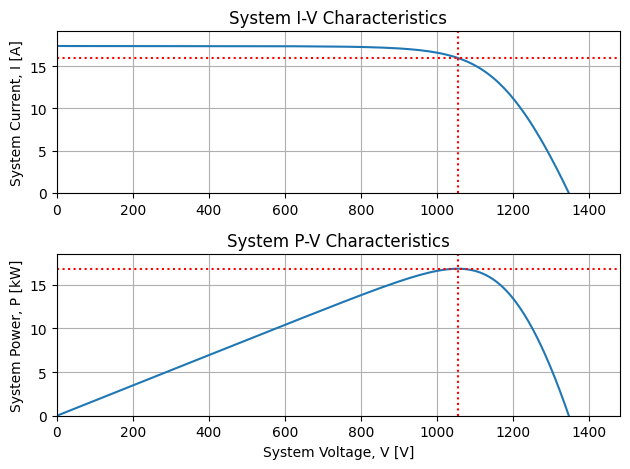

In [60]:
pvsys = create_system(module_type='std')
print("Pmp:", pvsys.Pmp, " Vmp:", pvsys.Vmp, " Imp:", pvsys.Imp)
ex1 = pvsys.plotSys()
plt.tight_layout()

### Example 2: Single module shading

Pmp after shading: 16516.783976274466
Imp after shading: 15.968366801150461
Vmp after shading: 1034.3439740552863


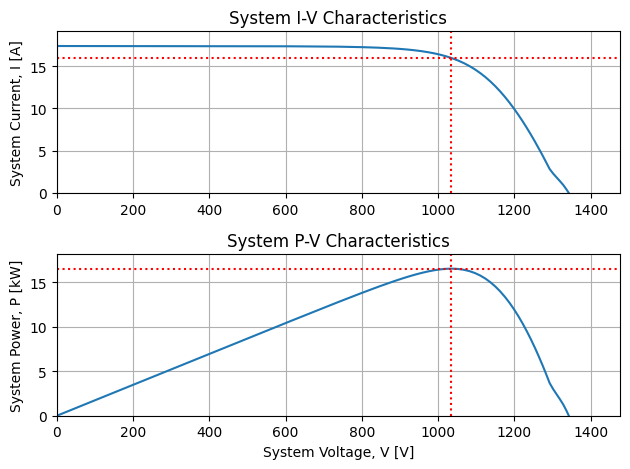

In [7]:
pvsys = create_system(module_type='std')
shade_modules(pvsys, {0: {0: 0.01}})
print("Pmp after shading:", pvsys.Pmp)
print("Imp after shading:", pvsys.Imp)
print("Vmp after shading:", pvsys.Vmp)
ex2 = pvsys.plotSys()
plt.tight_layout()

### Example 3: Partial shading & heating

Pmp after partial shading & heating: 13759.700599699421
Imp after partial shading & heating: 14.967222301784814
Vmp after partial shading & heating: 919.3222578152395


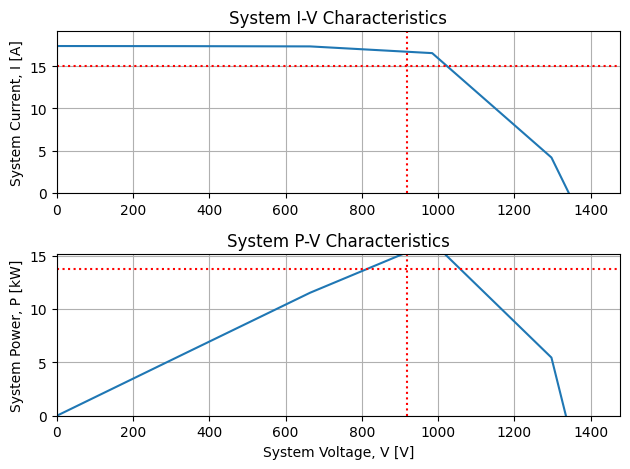

In [9]:
pvsys = create_system(module_type='std')
shade_modules(pvsys, {0: {0: [(0.2,)*8, (0,1,2,3,4,5,6,7)]}})
pvsys.setTemps({0:{0:[(100.0+273.15,)*8, (0,1,2,3,4,5,6,7)]}})
print("Pmp after partial shading & heating:", pvsys.Pmp)
print("Imp after partial shading & heating:", pvsys.Imp)
print("Vmp after partial shading & heating:", pvsys.Vmp)
ex3 = pvsys.plotSys()
plt.tight_layout()

### Example 4: Module removal

Module equivalent loss: 16.295164996505843
Pmp after module removal: 63742.939148295314
Imp after module removal: 177.3064252198471
Vmp after module removal: 359.5072150896883


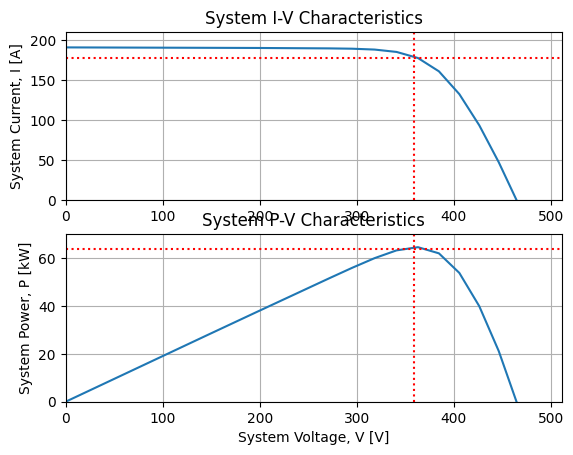

In [36]:
pvsys = create_system()
pvsys_degraded = remove_modules(pvsys, n_missing=12, strings_with_missing=10)
module_eq_diff = (pvsys.Pmp - pvsys_degraded.Pmp) / (pvsys.Pmp/len(pvsys.numberMods))
print("Module equivalent loss:", module_eq_diff)
print("Pmp after module removal:", pvsys_degraded.Pmp)
print("Imp after module removal:", pvsys_degraded.Imp)
print("Vmp after module removal:", pvsys_degraded.Vmp)
ex4 = pvsys_degraded.plotSys()

### Example 5: Loop over number of strings

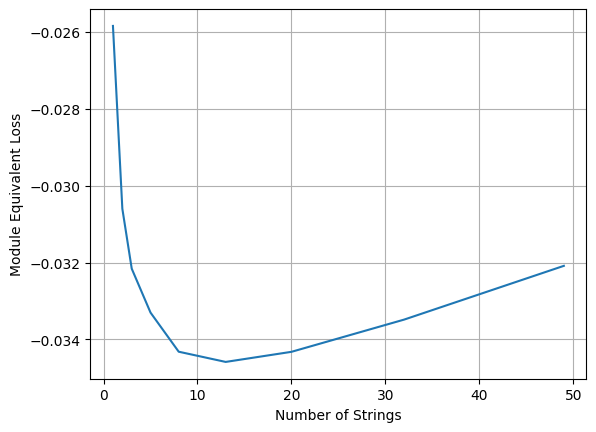

In [37]:
num_strings_list = np.unique(np.logspace(0, np.log10(50), num=10, dtype=int))
module_eq_diff_list = []

for num_strings in num_strings_list:
    sys = create_system(num_strings=num_strings)
    # shade module 0 in string 0 to 90% irradiance
    shade_modules(sys, {0:{0:0.9}})
    diff = (sys.Pmp - create_system(num_strings=num_strings).Pmp)/(sys.Pmp/len(sys.numberMods))
    module_eq_diff_list.append(diff)

plt.figure()
plt.plot(num_strings_list, module_eq_diff_list)
plt.xlabel("Number of Strings")
plt.ylabel("Module Equivalent Loss")
plt.grid()

### Example 6: Healthy vs Exponentially Degraded System

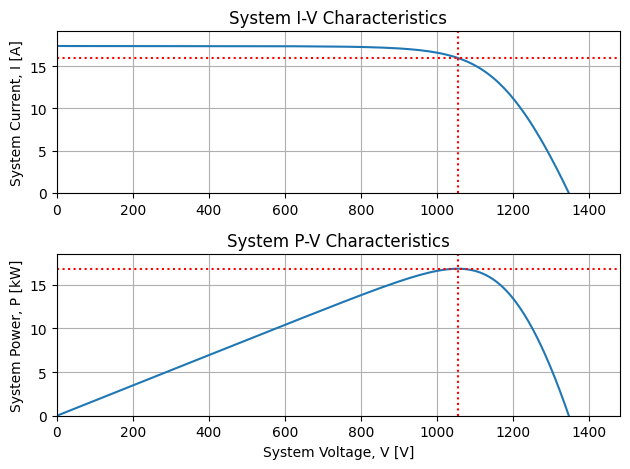

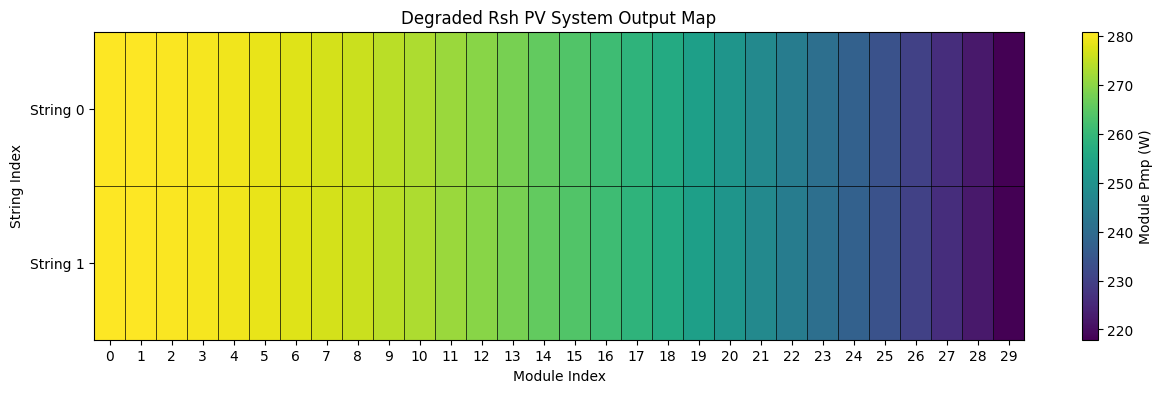

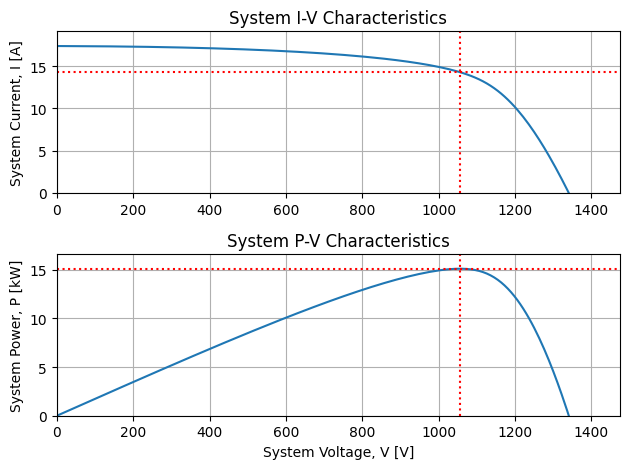

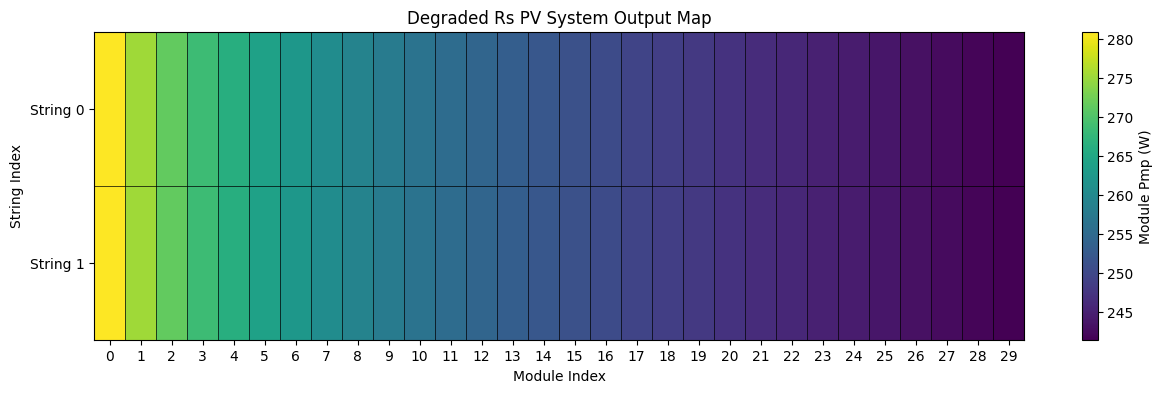

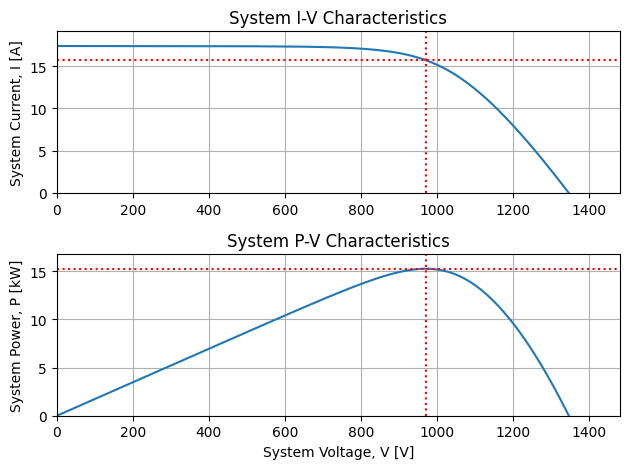

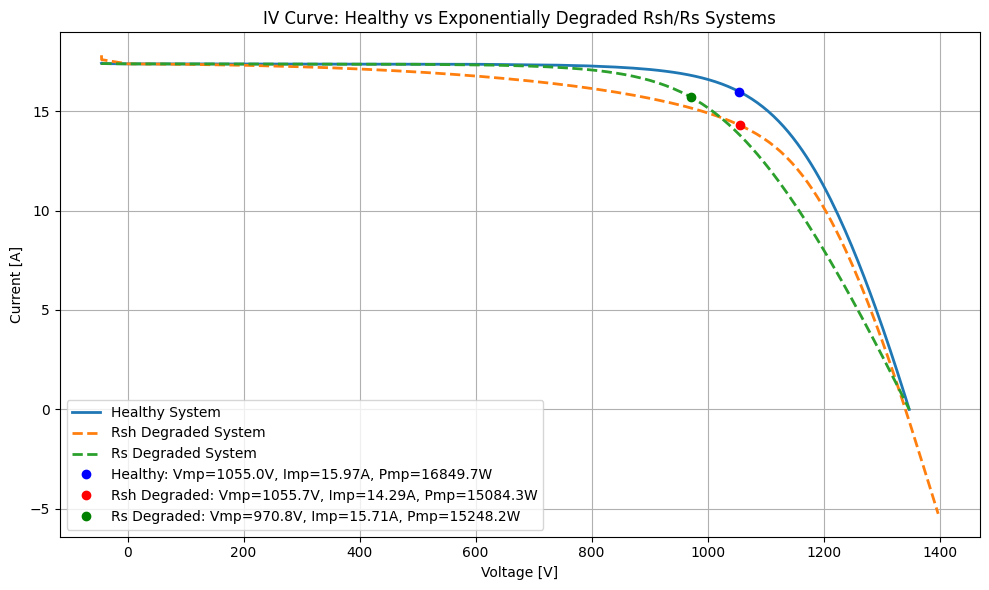

Healthy Pmp: 16849.723929502612
Rsh Degraded Pmp: 15084.32082027392
Rs Degraded Pmp: 15248.233127430683


In [10]:
# Healthy system
pvsys_healthy = create_system()
ex6_healthy = pvsys_healthy.plotSys()
plt.tight_layout()
plt.show()

# Exponentially degraded Rsh system
pvsys_Rsh_degraded = create_Rsh_degraded_system()
plot_pv_system(pvsys_Rsh_degraded, title="Rsh")
ex6_Rsh = pvsys_Rsh_degraded.plotSys()
plt.tight_layout()
plt.show()

# Exponentially degraded Rs system
pvsys_Rs_degraded = create_Rs_degraded_system()
plot_pv_system(pvsys_Rs_degraded, title="Rs")
ex6_Rs = pvsys_Rs_degraded.plotSys()
plt.tight_layout()
plt.show()

# Prepare legend labels with Pmp info
label_healthy = (f"Healthy: Vmp={pvsys_healthy.Vmp:.1f}V, "
                 f"Imp={pvsys_healthy.Imp:.2f}A, Pmp={pvsys_healthy.Pmp:.1f}W")
label_Rsh_degraded = (f"Rsh Degraded: Vmp={pvsys_Rsh_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rsh_degraded.Imp:.2f}A, Pmp={pvsys_Rsh_degraded.Pmp:.1f}W")
label_Rs_degraded = (f"Rs Degraded: Vmp={pvsys_Rs_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rs_degraded.Imp:.2f}A, Pmp={pvsys_Rs_degraded.Pmp:.1f}W")

# Plot IV curves
plt.figure(figsize=(10,6))
plt.plot(pvsys_healthy.Vsys, pvsys_healthy.Isys, label="Healthy System", lw=2)
plt.plot(pvsys_Rsh_degraded.Vsys, pvsys_Rsh_degraded.Isys, label="Rsh Degraded System", lw=2, ls="--")
plt.plot(pvsys_Rs_degraded.Vsys, pvsys_Rs_degraded.Isys, label="Rs Degraded System", lw=2, ls="--")

# Highlight Pmp points
plt.plot(pvsys_healthy.Vmp, pvsys_healthy.Imp, 'o', color='blue', label=label_healthy)
plt.plot(pvsys_Rsh_degraded.Vmp, pvsys_Rsh_degraded.Imp, 'o', color='red', label=label_Rsh_degraded)
plt.plot(pvsys_Rs_degraded.Vmp, pvsys_Rs_degraded.Imp, 'o', color='g', label=label_Rs_degraded)

plt.xlabel("Voltage [V]")
plt.ylabel("Current [A]")
plt.title("IV Curve: Healthy vs Exponentially Degraded Rsh/Rs Systems")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print Pmp values
print("Healthy Pmp:", pvsys_healthy.Pmp)
print("Rsh Degraded Pmp:", pvsys_Rsh_degraded.Pmp)
print("Rs Degraded Pmp:", pvsys_Rs_degraded.Pmp)

### Example 7: Mismatch Loss Calculator

In [64]:
import numpy as np

def mpp_from_curve(I, V, P):
    k = np.argmax(P)
    return P[k].squeeze().item(), I[k].squeeze().item(), V[k].squeeze().item()

def mismatch_report(pvsys, pvsys_healthy=None):
    """
    Reports degradation-only vs mismatch-only losses at the module, string, and system levels.

    pvsys = degraded system (with mismatch)
    pvsys_healthy = optional healthy system for reference
    """

    # --- actual system degraded MPP (with mismatch) ---
    Pmp_sys, _, _ = mpp_from_curve(pvsys.Isys, pvsys.Vsys, pvsys.Psys)

    # --- per-string degraded (with mismatch inside strings) ---
    Pmp_str = []
    for pvstr in pvsys.pvstrs:
        Pmp_s, _, _ = mpp_from_curve(pvstr.Istring, pvstr.Vstring, pvstr.Pstring)
        Pmp_str.append(Pmp_s)
    Pmp_str_sum = float(np.sum(Pmp_str))

    # --- per-module degraded (isolated, no mismatch inside strings) ---
    Pmp_mod = []
    for pvstr in pvsys.pvstrs:
        for mod in pvstr.pvmods:
            Pmp_m, _, _ = mpp_from_curve(mod.Imod, mod.Vmod, mod.Pmod)
            Pmp_mod.append(Pmp_m)
    Pmp_mod_sum = float(np.sum(Pmp_mod))

    # --- healthy baseline (if provided) ---
    Pmp_mod_healthy_sum = None
    Pmp_str_healthy_sum = None
    Pmp_sys_healthy = None
    if pvsys_healthy is not None:
        # Healthy modules
        Pmp_mod_healthy = []
        for pvstr in pvsys_healthy.pvstrs:
            for mod in pvstr.pvmods:
                Pmp_m, _, _ = mpp_from_curve(mod.Imod, mod.Vmod, mod.Pmod)
                Pmp_mod_healthy.append(Pmp_m)
        Pmp_mod_healthy_sum = float(np.sum(Pmp_mod_healthy))

        # Healthy strings
        Pmp_str_healthy = []
        for pvstr in pvsys_healthy.pvstrs:
            Pmp_s, _, _ = mpp_from_curve(pvstr.Istring, pvstr.Vstring, pvstr.Pstring)
            Pmp_str_healthy.append(Pmp_s)
        Pmp_str_healthy_sum = float(np.sum(Pmp_str_healthy))

        # Healthy system
        Pmp_sys_healthy, _, _ = mpp_from_curve(pvsys_healthy.Isys,
                                               pvsys_healthy.Vsys,
                                               pvsys_healthy.Psys)

    # --- Loss decomposition ---
    losses = {}

    # Module → String mismatch
    L_mismatch_mod_to_str = Pmp_mod_sum - Pmp_str_sum
    L_degradation_mods = (Pmp_mod_healthy_sum - Pmp_mod_sum) if Pmp_mod_healthy_sum else None

    # String → System mismatch
    L_mismatch_str_to_sys = Pmp_str_sum - Pmp_sys
    L_degradation_strs = (Pmp_str_healthy_sum - Pmp_str_sum) if Pmp_str_healthy_sum else None

    # Total system
    L_total_mismatch = L_mismatch_mod_to_str + L_mismatch_str_to_sys
    L_total_degradation = (Pmp_sys_healthy - Pmp_mod_sum) - L_total_mismatch if Pmp_sys_healthy else None
    L_total = (Pmp_sys_healthy - Pmp_sys) if Pmp_sys_healthy else None

    losses.update({
        "Pmp_system_degraded": Pmp_sys,
        "Pmp_strings_sum": Pmp_str_sum,
        "Pmp_modules_sum": Pmp_mod_sum,
        "Pmp_modules_healthy_sum": Pmp_mod_healthy_sum,

        # Mismatch components
        "Mismatch_mod_to_str": L_mismatch_mod_to_str,
        "Mismatch_str_to_sys": L_mismatch_str_to_sys,
        "Mismatch_total": L_total_mismatch,

        # Degradation components
        "Degradation_mods_only": L_degradation_mods,
        "Degradation_strs_only": L_degradation_strs,
        "Degradation_total": L_total_degradation,

        # Total system loss
        "Loss_total": L_total,

        # Percentages (relative to healthy)
        "Percent_mismatch": 100.0 * L_total_mismatch / Pmp_sys_healthy if Pmp_sys_healthy else None,
        "Percent_degradation": 100.0 * L_total_degradation / Pmp_sys_healthy if (Pmp_sys_healthy and L_total_degradation) else None,
        "Percent_total": 100.0 * L_total / Pmp_sys_healthy if Pmp_sys_healthy else None,
    })

    return losses


# Run Mismatch Loss Calculator
report = mismatch_report(pvsys_Rsh_degraded, pvsys_healthy=pvsys_healthy)

# Print
for k, v in report.items():
    print(f"{k:25s}: {v}")


Pmp_system_degraded      : 15085.09102574643
Pmp_strings_sum          : 15087.501913803468
Pmp_modules_sum          : 15557.317614381176
Pmp_modules_healthy_sum  : 16854.05523414129
Mismatch_mod_to_str      : 469.8157005777084
Mismatch_str_to_sys      : 2.4108880570383917
Mismatch_total           : 472.2265886347468
Degradation_mods_only    : 1296.7376197601152
Degradation_strs_only    : 1766.553332200123
Degradation_total        : 824.5485974259991
Loss_total               : 1769.0017746954927
Percent_mismatch         : 2.801851124388996
Percent_degradation      : 4.892275171312567
Percent_total            : 10.49597742009056
